In [5]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyLIMA.outputs import pyLIMA_plots
from cycler import cycler
sys.path.append(os.path.dirname(os.getcwd()))
from class_functions_roman_rubin import sim_events

In [6]:
current_path = os.path.dirname(os.getcwd())
model='USBL'
path_save_sim= current_path+'/test_sim_fit/'
path_save_fit= current_path+'/test_sim_fit/'
path_ephemerides= current_path+'/ephemerides/Gaia.txt'
path_dataslice = current_path+'/opsims/baseline/dataSlice.npy'
path_TRILEGAL_set= current_path+'/TRILEGAL/PB_planet_split_1.csv'
i=18
data_trilegal = pd.read_csv(path_TRILEGAL_set)
data = data_trilegal.iloc[int(i)]
event = sim_events(model, path_ephemerides, path_dataslice, data, i, path_save_sim, path_save_fit)
ZP = {'W149':27.615, 'u':27.03, 'g':28.38, 'r':28.16, 'i':27.85, 'z':27.46, 'y':26.68}


In [7]:
new_creation, my_own_model = event.sim_event_OM()


/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 20736 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 20736 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: 

Parallax(Full) estimated for the telescope W149: SUCCESS
Parallax(Full) estimated for the telescope u: SUCCESS
Parallax(Full) estimated for the telescope g: SUCCESS
Parallax(Full) estimated for the telescope r: SUCCESS
Parallax(Full) estimated for the telescope i: SUCCESS
Parallax(Full) estimated for the telescope z: SUCCESS
Parallax(Full) estimated for the telescope y: SUCCESS


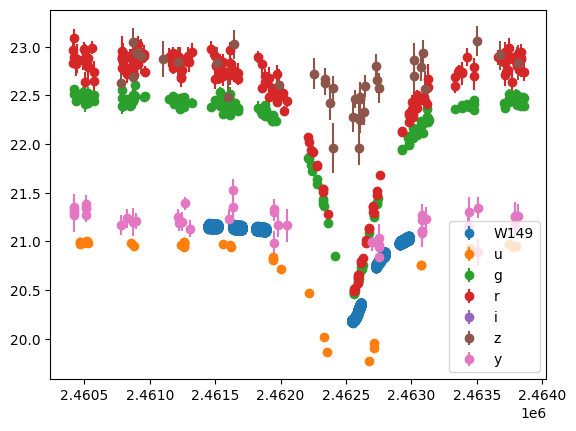

In [24]:

for i in range(len(new_creation.telescopes)):
    tel = new_creation.telescopes[i]
    time = tel.lightcurve_magnitude['time']
    mag = tel.lightcurve_magnitude['mag']
    err_mag = tel.lightcurve_magnitude['err_mag']
    plt.errorbar(time,mag,err_mag, marker='o',ls='',label=tel.name)

plt.legend()

In [9]:
my_own_model